# Машинное обучение, ФКН ВШЭ

# Практическое задание 1

## Общая информация

Дата выдачи: 16.09.2016

Срок сдачи: 30.09.2016 23:59MSK

### О задании

Практическое задание 1 посвящено изучению основных библиотек для анализа данных, а также линейных моделей и методов их обучения. Вы научитесь:
 * применять библиотеки NumPy и Pandas для осуществления желаемых преобразований;
 * подготавливать данные для обучения линейных моделей;
 * обучать линейную, Lasso и Ridge-регрессии при помощи модуля scikit-learn;
 * реализовывать обычный и стохастический градиентные спуски;
 * обучать линейную регрессию для произвольного функционала качества.
 

### Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Кроме того, некоторые из заданий являются опциональными (необязательными), однако за их выполнение можно получить дополнительные баллы, которые позднее будут учитываться при проставлении оценок автоматом по курсу.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце Вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник). 

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Для сдачи задания переименуйте получившийся файл \*.ipynb в соответствии со следующим форматом: *HW1_Username.ipynb*, где *Username* — Ваша фамилия и инициалы на латинице (например, *HW1_IvanovII.ipynb*). Далее отправьте этот файл на hse.cs.ml+<номер группы>@gmail.com (например, hse.cs.ml+141@gmail.com для студентов группы БПМИ-141).

## Библиотеки для анализа данных

### NumPy

Во всех заданиях данного раздела запрещено использовать циклы  и list comprehensions. Под вектором и матрицей в данных заданиях понимается одномерный и двумерный numpy.array соответственно.

In [1]:
import numpy as np

**1. (0.2 балла)** Реализуйте функцию, возвращающую максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой. Для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответом является 5. Если нулевых элементов нет, функция должна возвращать None.


In [2]:
def max_element(arr):
    vals = arr[1:][arr[:-1] == 0]
    if len(vals) == 0:
        return None
    else:
        return np.max(vals)
print max_element(np.array([1]))
print max_element(np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]))

None
5


**2. (0.2 балла)** Реализуйте функцию, принимающую на вход матрицу и некоторое число и возвращающую ближайший к числу элемент матрицы. Например: для X = np.arange(0,10).reshape((2, 5)) и v = 3.6 ответом будет 4.

In [3]:
def nearest_value(X, v):
    idx = np.argmin(np.abs(X - v))
    return X.reshape(-1)[idx]
print nearest_value(np.arange(0,10).reshape((2, 5)), 3.6)

4


**3. (0.2 балла)** Реализуйте функцию scale(X), которая принимает на вход матрицу и масштабирует каждый ее столбец (вычитает выборочное среднее и делит на стандартное отклонение). Убедитесь, что в функции не будет происходить деления на ноль. Протестируйте на случайной матрице (для её генерации можно использовать, например, функцию [numpy.random.randint](http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randint.html)).

In [4]:
def scale(X):
    eps = 1e-6
    y = X - np.mean(X, axis=0)
    std = np.std(y, axis=0)
    std = np.where(np.abs(std) > eps, std, [1] * len(std))
    return y / std

print scale(np.random.randint(0, 3, size=(3, 5)))
print scale(np.hstack((np.random.randint(0, 3, size=(3, 5)), np.array([1, 1, 1]).reshape(-1, 1))))

[[-0.70710678 -1.41421356  0.70710678 -1.41421356 -1.41421356]
 [-0.70710678  0.70710678  0.70710678  0.70710678  0.70710678]
 [ 1.41421356  0.70710678 -1.41421356  0.70710678  0.70710678]]
[[ 0.70710678 -1.22474487  0.70710678 -0.70710678  1.41421356  0.        ]
 [-1.41421356  1.22474487 -1.41421356  1.41421356 -0.70710678  0.        ]
 [ 0.70710678  0.          0.70710678 -0.70710678 -0.70710678  0.        ]]


**4. (0.2 балла)** Реализуйте функцию, которая для заданной матрицы находит:
 - определитель
 - след
 - наименьший и наибольший элементы
 - норму Фробениуса
 - собственные числа
 - обратную матрицу

Для тестирования сгенерируйте матрицу с |лементами из нормального распределения $\mathcal{N}$(10,1)

In [5]:
def get_stats(X):
    return (np.linalg.det(X), np.trace(X), np.max(X), np.min(X), 
            np.linalg.norm(X), np.linalg.eigvals(X), np.linalg.inv(X))
X = np.random.randn(5, 5) + 10
print X
print '\n'.join(repr(x) for x in get_stats(X))

[[ 10.30633576  11.12909783   9.08432289   9.50718301   8.46059144]
 [ 10.12750527   8.92458178  10.96282874  11.90474012   8.13796042]
 [  9.35065644  11.17385329  11.04206253  11.05919778  10.58658503]
 [ 10.38936424   9.56232229  11.74106839  10.70718057  11.10899684]
 [  8.59726705  11.00644269   9.78386272  10.39264635  10.9125864 ]]
259.90599916800454
51.892747043835804
11.904740123715753
8.1379604214600239
51.445795414709238
array([ 51.25329064+0.j        ,   2.30995597+0.j        ,
        -1.10853043+1.66964044j,  -1.10853043-1.66964044j,   0.54656129+0.j        ])
array([[ 0.29515963,  0.06428596, -0.74642315,  0.26905016,  0.17345229],
       [ 0.14320192, -0.18823546,  0.62397482, -0.27618342, -0.29483037],
       [-0.12663717, -0.26481896,  1.30377066,  0.07822195, -1.04878298],
       [-0.1769539 ,  0.44938604, -0.59061721, -0.26205788,  0.64181561],
       [-0.09490783, -0.05133876, -0.64772741,  0.24603361,  0.58142073]])


**5. (0.2 балла)** Повторите 100 раз следующий эксперимент: сгенерируйте две матрицы размера 10×10 из стандартного нормального распределения, перемножьте их (как матрицы) и найдите максимальный элемент. Какое среднее значение по экспериментам у максимальных элементов? 95-процентная квантиль?

In [6]:
values = [np.max(np.random.randn(10, 10).dot(np.random.randn(10, 10))) for i in range(100)] # понятия не имею как это делать без цикла
print 'mean value over experiments is {}'.format(np.mean(values))
print 'standard deviation over experiments is {}'.format(np.std(values))
print '95% percentile: {}'.format(np.percentile(values, 95))

mean value over experiments is 8.17614038575
standard deviation over experiments is 1.72273771866
95% percentile: 11.5542365691


### Pandas

![](https://metrouk2.files.wordpress.com/2015/10/panda.jpg)

#### Ответьте на вопросы о данных по авиарейсам в США за январь-апрель 2008 года.

[Данные](https://www.dropbox.com/s/dvfitn93obn0rql/2008.csv?dl=0) и их [описание](http://stat-computing.org/dataexpo/2009/the-data.html)

In [7]:
import pandas as pd
%matplotlib inline
data = pd.read_csv('2008.csv')
data

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,6,18,3,2111.0,2055,2308.0,2300,WN,242,...,3.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,6,4,3,1426.0,1410,1730.0,1728,XE,2380,...,4.0,12.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,8,3,7,1143.0,1145,1501.0,1520,WN,1769,...,4.0,9.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,23,3,1141.0,1144,1323.0,1335,OO,3802,...,4.0,19.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,5,4,7,815.0,820,1243.0,1300,WN,399,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
5,2008,1,3,4,1349.0,1325,1640.0,1609,B6,834,...,5.0,13.0,0,NaN,0,13.0,0.0,7.0,0.0,11.0
6,2008,3,31,1,1359.0,1400,1413.0,1415,WN,1589,...,5.0,14.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
7,2008,4,22,2,1815.0,1820,2057.0,2131,DL,617,...,9.0,31.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
8,2008,3,4,2,626.0,630,820.0,830,WN,454,...,4.0,6.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
9,2008,10,6,1,1905.0,1907,24.0,37,UA,270,...,6.0,16.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN


**6. (0.3 балла)** Какая из причин отмены рейса (`CancellationCode`) была самой частой? (расшифровки кодов можно найти в описании данных)

In [8]:
cancellation_reasons = {'A': 'carrier', 'B': 'weather', 'C': 'nas', 'D': 'security'}
print cancellation_reasons[np.argmax(data.groupby('CancellationCode').count()['Cancelled'])]

carrier


**7. (0.3 балла)** Найдите среднее, минимальное и максимальное расстояние, пройденное самолетом.

In [9]:
print 'mean distance {} km'.format(np.mean(data['Distance']) * 1.852)
print 'max  distance {} km'.format(np.max(data['Distance']) * 1.852)
print 'min  distance {} km'.format(np.min(data['Distance']) * 1.852)

mean distance 1341.78929223 km
max  distance 9189.624 km
min  distance 57.412 km


**8. (0.3 балла)** Не выглядит ли подозрительным минимальное пройденное расстояние? В какие дни и на каких рейсах оно было? Какое расстояние было пройдено этими же рейсами в другие дни?

In [10]:
strange_flights = data['Distance'] == np.min(data['Distance'])
print data[strange_flights][['DayofMonth', 'Month', 'Origin', 'Dest', 'FlightNum', 'TailNum']]
"""
It is Wrangell Airport in northern Alaska. No road access exists to the nearby territory.
The other one is Petersburg Airport. It it nearby.
"""
print data[data['FlightNum'] == 65][['DayofMonth', 'Month', 'Origin', 'Dest', 'FlightNum', 'TailNum', 'Distance']]
print data[data['FlightNum'] == 64][['DayofMonth', 'Month', 'Origin', 'Dest', 'FlightNum', 'TailNum', 'Distance']]

       DayofMonth  Month Origin Dest  FlightNum TailNum
1116           30     12    WRG  PSG         65  N795AS
6958           26     12    WRG  PSG         65  N795AS
17349          18      8    PSG  WRG         64  N768AS
27534          11      3    PSG  WRG         64  N764AS
46082           9      8    WRG  PSG         65  N708AS
48112          28      2    PSG  WRG         64  N762AS
       DayofMonth  Month Origin Dest  FlightNum TailNum  Distance
1116           30     12    WRG  PSG         65  N795AS        31
1517           10      7    SEA  KTN         65  N703AS       680
6326           18     10    KTN  WRG         65  N760AS        82
6958           26     12    WRG  PSG         65  N795AS        31
10113          24      7    JNU  ANC         65  N785AS       571
14646          29     11    EWR  LAX         65  N21108      2454
15173          22     10    JFK  TPA         65  N653JB      1005
26025          13      5    FLL  ATL         65  N317AT       581
26109         

**9. (0.3 балла)** Из какого аэропорта было произведено больше всего вылетов? В каком городе он находится?

In [11]:
print np.argmax(data.groupby('Origin').count()['FlightNum'])
print 'ATL is an airport in Atlanta, GA'

ATL
ATL is an airport in Atlanta, GA


**10. (0.3 балла)** Найдите для каждого аэропорта среднее время полета (`AirTime`) по всем вылетевшим из него рейсам. Какой аэропорт имеет наибольшее значение этого показателя?

In [12]:
print 'maximum avg air time {}'.format(data.groupby('Origin')['AirTime'].mean().argmax())
print 'SJU is an airport in Puerto Rico'

maximum avg air time SJU
SJU is an airport in Puerto Rico


**11. (0.5 балла)** Найдите аэропорт, у которого наибольшая доля задержанных (`DepDelay > 0`) рейсов. Исключите при этом из рассмотрения аэропорты, из которых было отправлено меньше 1000 рейсов (используйте функцию `filter` после `groupby`).

In [13]:
ap = data.groupby('Origin').filter(lambda x: x['Year'].count() >= 1000).groupby('Origin')['DepDelay']
print ap.agg(lambda x: np.mean(x > 0)).argmax()
print 'EWR is an airport in Newark, NJ, near NYC'

EWR
EWR is an airport in Newark, NJ, near NYC


## Линейная регрессия

В этой части мы разберемся с линейной регрессией, способами её обучения и измерением качества ее прогнозов. 

Будем рассматривать датасет из предыдущей части задания для предсказания времени задержки отправления рейса в минутах (DepDelay). Отметим, что под задержкой подразумевается не только опоздание рейса относительно планируемого времени вылета, но и отправление до планируемого времени.

### Подготовка данных

**12. (0.5 балла)** Считайте выборку из файла при помощи функции pd.read_csv и ответьте на следующие вопросы:
   - Имеются ли в данных пропущенные значения?
   - Сколько всего пропущенных элементов в таблице "объект-признак"?
   - Сколько объектов имеют хотя бы один пропуск?
   - Сколько признаков имеют хотя бы одно пропущенное значение?

In [14]:
print 'there are empty data' if data.isnull().any().any() else 'there are no empty data'
print 'totally there are {} empty elements'.format(data.isnull().sum().sum())
print 'totally {} objects contains empty elements'.format(data.isnull().any(axis=1).sum())
print 'totally {} features contains empty elements'.format(data.isnull().any(axis=0).sum())

there are empty data
totally there are 355215 empty elements
totally 70000 objects contains empty elements
totally 16 features contains empty elements


Как вы понимаете, также не имеет смысла рассматривать при решении поставленной задачи объекты с пропущенным значением целевой переменной. В связи с этим ответьте на следующие вопросы и выполните соответствующие действия:
- Имеются ли пропущенные значения в целевой переменной?
- Проанализируйте объекты с пропущенными значениями целевой переменной. Чем вызвано это явление? Что их объединяет? Можно ли в связи с этим, на ваш взгляд, исключить какие-то признаки из рассмотрения? Обоснуйте свою точку зрения.

Исключите из выборки объекты **с пропущенным значением целевой переменной и со значением целевой переменной, равным 0**, а также при необходимости исключите признаки в соответствии с вашим ответом на последний вопрос из списка и выделите целевую переменную в отдельный вектор, исключив её из матрицы "объект-признак".

In [15]:
print 'target variable is missing sometimes' if data['DepDelay'].isnull().any() else 'target variable always present'
#print data[data['DepDelay'].isnull()]
#hypothesis: every flight that is missing DepDelay is cancelled
print np.sum(1 - data[data['DepDelay'].isnull()]['Cancelled'])
new_data = data[data['Cancelled'] == 0].drop(['Cancelled', 'CancellationCode'], 1)
y = new_data['DepDelay']
new_data.drop('DepDelay', 1, inplace=True)
new_data.drop(y[y == 0].index, inplace=True)
y.drop(y[y == 0].index, inplace=True)

target variable is missing sometimes
0


**13. (0.5 балла)** Обратите внимание, что признаки DepTime, CRSDepTime, ArrTime, CRSArrTime приведены в формате hhmm, в связи с чем будет не вполне корректно рассматривать их как вещественные.

Преобразуйте каждый признак FeatureName из указанных в пару новых признаков FeatureName\_Hour, FeatureName\_Minute, разделив каждое из значений на часы и минуты. Не забудьте при этом исключить исходный признак из выборки. В случае, если значение признака отсутствует, значения двух новых признаков, его заменяющих, также должны отсутствовать. 

Например, признак DepTime необходимо заменить на пару признаков DepTime_Hour, DepTime_Minute. При этом, например, значение 155 исходного признака будет преобразовано в значения 1 и 55 признаков DepTime_Hour, DepTime_Minute соответственно.

In [16]:
for feat in 'DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime':
    new_data[feat + '_Hour'] = (data[feat] / 100).round()
    new_data[feat + '_Minute'] = (data[feat] % 100).round()
    new_data.drop(feat, 1, inplace=True, errors='ignore')

**14. (0.5 балла)** Некоторые из признаков, отличных от целевой переменной, могут оказывать чересчур значимое влияние на прогноз, поскольку по своему смыслу содержат большую долю информации о значении целевой переменной. Изучите описание датасета и исключите признаки, сильно коррелирующие с ответами. Ваш выбор признаков для исключения из выборки обоснуйте. Кроме того, исключите признаки TailNum и Year.

In [17]:
"real times gives almost all the information 'bout the delay"
depTimeHour = new_data['DepTime_Hour'] # Чтобы строить гистограмму

# Все эти данные - это реальные времена прилётов/отправлений, очевидно вместе с планируемыми они содержат львиную долю
# информации об ответе
new_data.drop(['DepTime_Hour', 'DepTime_Minute', 'ArrTime_Hour', 'ArrTime_Minute', 
               'ActualElapsedTime', 'ArrDelay'], 1, inplace=True)
new_data.drop(['Diverted', 'AirTime'], 1, inplace=True) # этот признак не известен до вылета
new_data.drop(['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'], 1, inplace=True)
new_data.drop(['TailNum', 'Year'], 1, inplace=True)

**15. (1 балл)** Приведем данные к виду, пригодному для обучения линейных моделей. Для этого вещественные признаки надо отмасштабировать, а категориальные — привести к числовому виду. Также надо устранить пропуски в данных.

В первую очередь поймем, зачем необходимо применять масштабирование. Следующие ячейки с кодом построят гистограммы для 3 вещественных признаков выборки.

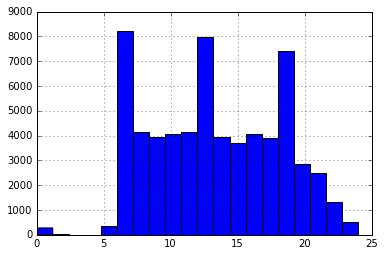

In [18]:
depTimeHour.hist(bins=20) # already deleted DepTime_Hour

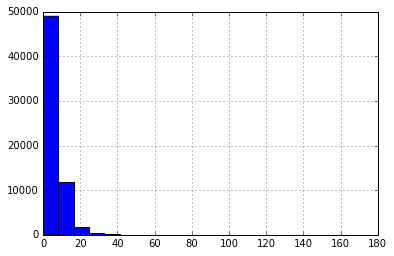

In [19]:
new_data['TaxiIn'].hist(bins=20)

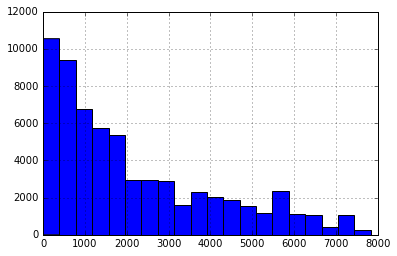

In [20]:
new_data['FlightNum'].hist(bins=20)

Какую проблему вы наблюдаете на этих графиках? Как масштабирование поможет её исправить?

Некоторые из признаков в нашем датасете являются категориальными. Типичным подходом к работе с ними является бинарное, или [one-hot-кодирование](https://en.wikipedia.org/wiki/One-hot).

Реализуйте функцию transform_data, которая принимает на вход DataFrame с признаками и выполняет следующие шаги:
1. Замена пропущенных значений на нули для вещественных признаков и на строки 'nan' для категориальных.
2. Масштабирование вещественных признаков с помощью [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).
3. One-hot-кодирование категориальных признаков с помощью [DictVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html) или функции [pd.get_dummies](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html).

Метод должен возвращать преобразованный DataFrame, который должна состоять из масштабированных вещественных признаков и закодированных категориальных (исходные признаки должны быть исключены из выборки).

In [21]:
x = data['DepDelay'] - data['CarrierDelay'] - data['NASDelay'] - data['SecurityDelay'] - data['LateAircraftDelay']

In [22]:
new_data.columns

Index([u'Month', u'DayofMonth', u'DayOfWeek', u'UniqueCarrier', u'FlightNum',
       u'CRSElapsedTime', u'Origin', u'Dest', u'Distance', u'TaxiIn',
       u'TaxiOut', u'DepDelay', u'CRSDepTime_Hour', u'CRSDepTime_Minute',
       u'CRSArrTime_Hour', u'CRSArrTime_Minute'],
      dtype='object')

In [23]:
new_data.isnull().any(axis=0)

Month                False
DayofMonth           False
DayOfWeek            False
UniqueCarrier        False
FlightNum            False
CRSElapsedTime        True
Origin               False
Dest                 False
Distance             False
TaxiIn                True
TaxiOut              False
DepDelay             False
CRSDepTime_Hour      False
CRSDepTime_Minute    False
CRSArrTime_Hour      False
CRSArrTime_Minute    False
dtype: bool

In [24]:
new_data['CRSElapsedTime'].isnull().sum()

5

In [25]:
null_elapsed_time = new_data['CRSElapsedTime'][new_data['CRSElapsedTime'].isnull()].index
new_data.drop(null_elapsed_time, inplace=True)
y.drop(null_elapsed_time, inplace=True)

In [26]:
new_data['TaxiIn'].isnull().sum()

123

In [27]:
null_taxi_in = new_data['TaxiIn'][new_data['TaxiIn'].isnull()].index
new_data.drop(null_taxi_in, inplace=True)
y.drop(null_taxi_in, inplace=True)

In [28]:
import sklearn.preprocessing
from sklearn.preprocessing import StandardScaler, scale
def transform_data(data):
    real_valued = ['Month', 'DayofMonth', 'CRSElapsedTime', 'Distance', 
                   'TaxiIn', 'TaxiOut','CRSDepTime_Hour', 'CRSDepTime_Minute',
                   'CRSArrTime_Hour', 'CRSArrTime_Minute']
    discrete = ['DayOfWeek', 'UniqueCarrier', 'FlightNum', 'Origin', 'Dest']
    real = data[real_valued].apply(lambda x: scale(x.astype(np.float64)))
    discr =  pd.get_dummies(data[discrete])
    return real.join(discr)

Примените функцию transform_data к данным. Сколько признаков получилось после преобразования?

In [29]:
ndata = transform_data(new_data)
print len(ndata.columns)

626


**16. (0.5 балла)** Разбейте выборку и вектор целевой переменной на обучение и контроль в отношении 70/30 (для этого можно использовать, например, функцию [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html)). 

In [30]:
from sklearn import cross_validation
X_train, X_test, y_train, y_test = cross_validation.train_test_split(ndata, y)

### Scikit-learn

<img src = "https://pp.vk.me/c4534/u35727827/93547647/x_d31c4463.jpg">
Теперь, когда мы привели данные к пригодному виду, попробуем решить задачу при помощи метода наименьших квадратов. Напомним, что данный метод заключается в оптимизации функционала $MSE$:

$$MSE(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 \to \min_{w},$$

где $\{ (x_i, y_i ) \}_{i=1}^l$ — обучающая выборка, состоящая из $l$ пар объект-ответ.

Заметим, что решение данной задачи уже реализовано в модуле sklearn в виде класса [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression).

**17. (0.5 балла)** Обучите линейную регрессию на 1000 объектах из обучающей выборки и выведите значения $MSE$ и $R^2$ на этой подвыборке и контрольной выборке (итого 4 различных числа). Проинтерпретируйте полученный результат — насколько качественные прогнозы строит полученная модель? Какие проблемы наблюдаются в модели?

**Подсказка**: изучите значения полученных коэффициентов $w$, сохраненных в атрибуте coef_ объекта LinearRegression.

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
reg = LinearRegression()
reg.fit(X_train[:1000], y_train[:1000])
print 'r2 score on the training set: {0:.2}'.format(r2_score(y_train[:1000], reg.predict(X_train[:1000])))
print 'r2 score on the test set: {0:.2}'.format(r2_score(y_test, reg.predict(X_test)))
print 'it already does seem like overlearning. R2 < 0 is bad thing. it is a very bad thing.'
print 'underlearned model cannot be so bad'
print 'mse on the training set: {}'.format(mean_squared_error(y_train[:1000], reg.predict(X_train[:1000])))
print 'mse on the test set: {}'.format(mean_squared_error(y_test, reg.predict(X_test)))
print 'it also looks like overlearning, even though it is less obvious'
del reg

r2 score on the training set: 0.35
r2 score on the test set: -0.3
it already does seem like overlearning. R2 < 0 is bad thing. it is a very bad thing.
underlearned model cannot be so bad
mse on the training set: 803.945622647
mse on the test set: 1628.77425836
it also looks like overlearning, even though it is less obvious


Для решения описанных вами в предыдущем пункте проблем используем L1- или L2-регуляризацию, тем самым получив Lasso и Ridge регрессии соответственно и изменив оптимизационную задачу одним из следующих образов:
$$MSE_{L1}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_1 \to \min_{w},$$
$$MSE_{L2}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_2^2 \to \min_{w},$$

где $\alpha$ — коэффициент регуляризации. Один из способов его подбора заключается в переборе некоторого количества значений и оценке качества на кросс-валидации для каждого из них, после чего выбирается значение, для которого было получено наилучшее качество.

**18. (0.5 балла)** Обучите линейные регрессии с L1- и L2-регуляризатором, подобрав лучшее значение параметра регуляризации из списка alpha_grid при помощи кросс-валидации c 5 фолдами на тех же 1000 объектах, что и в п.17. Выведите значения $MSE$ и $R^2$ на обучающей и контрольной выборках. Удалось ли решить указанные вами ранее проблемы?

Для выполнения данного задания вам могут понадобиться реализованные в библиотеке объекты [LassoCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html), [RidgeCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) и [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html).


In [33]:
def print_scores(reg):
    print 'r2 score on the training set: {0:.2}'.format(r2_score(y_train[:1000], reg.predict(X_train[:1000])))
    print 'r2 score on the test set: {0:.2}'.format(r2_score(y_test, reg.predict(X_test)))
    print 'mse on the training set: {}'.format(mean_squared_error(y_train[:1000], reg.predict(X_train[:1000])))
    print 'mse on the test set: {}'.format(mean_squared_error(y_test, reg.predict(X_test)))
alpha_grid = np.logspace(-3, 3, 10)
l2reg = sklearn.linear_model.RidgeCV(alphas=alpha_grid, cv=5)
l1reg = sklearn.linear_model.LassoCV(alphas=alpha_grid, cv=5)
l2reg.fit(X_train[:1000], y_train[:1000])
l1reg.fit(X_train[:1000], y_train[:1000])
print 'Lasso scores: '
print_scores(l1reg)
print 'Ridge scores:'
print_scores(l2reg)
del l1reg, l2reg

print 'Problem solved - we perform poorly on both sets now!'

/home/paul/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)


Lasso scores: 
r2 score on the training set: 0.065
r2 score on the test set: 0.021
mse on the training set: 1151.21635494
mse on the test set: 1222.85800352
Ridge scores:
r2 score on the training set: 0.077
r2 score on the test set: 0.026
mse on the training set: 1136.82926047
mse on the test set: 1216.7760942
Problem solved - we perform poorly on both sets now!


### Градиентный спуск

В предыдущем разделе мы использовали существующие реализации методов обучения линейной регрессии с регуляризацией и без. Тем не менее, подобные реализации, как правило, имеются лишь для ограниченного набора стандартных методов. В частности, при выходе функционала качества за пределы стандартного множества необходимо самостоятельно реализовывать составляющие процесса решения оптимизационной задачи. Именно этому и посвящен данный раздел задания.

Пусть необходимо минимизировать следующий функционал (Mean Square Percentage Error — модифицированный [RMSPE](https://www.kaggle.com/c/rossmann-store-sales/details/evaluation)):
$$MSPE(\{x_i, y_i\}_{i=1}^l, \, w) = \frac{1}{l}\sum_{i=1}^l \left( \frac{y_i - \langle w, x_i \rangle }{y_i} \right)^2,$$

где $\{x_i, y_i\}_{i=1}^l$ — обучающая выборка, $w$ — вектор весов линейной модели. Будем также рассматривать функционал $MSPE$ с L2-регуляризацией:

$$MSPE(\{x_i, y_i\}_{i=1}^l, \, w) = \frac{1}{l}\sum_{i=1}^l \left( \frac{y_i - \langle w, x_i \rangle }{y_i} \right)^2 + ||w||_2^2.$$

**19. (0 баллов)** Добавьте к объектам обеих выборок из п. 16 единичный признак.

In [34]:
X_train.loc[:, '1'] = pd.Series([1] * len(X_train.index), index = X_train.index)
X_test.loc[:, '1'] = pd.Series([1] * len(X_test.index), index = X_test.index)
X_train.columns

/home/paul/anaconda2/lib/python2.7/site-packages/pandas/core/indexing.py:288: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/paul/anaconda2/lib/python2.7/site-packages/pandas/core/indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Index([u'Month', u'DayofMonth', u'CRSElapsedTime', u'Distance', u'TaxiIn',
       u'TaxiOut', u'CRSDepTime_Hour', u'CRSDepTime_Minute',
       u'CRSArrTime_Hour', u'CRSArrTime_Minute',
       ...
       u'Dest_TYS', u'Dest_VLD', u'Dest_VPS', u'Dest_WRG', u'Dest_WYS',
       u'Dest_XNA', u'Dest_YAK', u'Dest_YKM', u'Dest_YUM', u'1'],
      dtype='object', length=627)

**20. (1 балл)** Реализуйте функции, которые вычисляют:
 * прогнозы линейной модели;
 * функционал $MSPE$ и его градиент;
 * регуляризованный $MSPE$ и его градиент.

In [35]:
# возвращает вектор прогнозов линейной модели с вектором весов w для выборки X
def make_pred(X, w):
    return X.dot(w)
make_pred(np.array(X_train), np.array([0] * X_train.shape[1]).reshape(-1, 1))

array([[ 0.],
       [ 0.],
       [ 0.],
       ..., 
       [ 0.],
       [ 0.],
       [ 0.]])

In [36]:
# возвращает значение функционала MSPE для выборки (X, y) и вектора весов w
def get_func(w, X, y):
    return np.sum(((y - X.dot(w)) / y) ** 2) / len(y)
get_func(np.array([0] * X_train.shape[1]).reshape(-1, 1), np.array(X_train), np.array(y_train).reshape(-1, 1))

1.0

In [37]:
np.array(X_train) / np.array(y_train).reshape(-1, 1)

array([[ 0.31666688, -0.00592139,  0.27210839, ..., -0.        ,
        -0.        , -0.2       ],
       [ 0.02816481,  0.04732237,  0.02700794, ...,  0.        ,
         0.        ,  0.03703704],
       [-0.35114098,  0.14141552, -0.61044869, ..., -0.        ,
        -0.        , -0.33333333],
       ..., 
       [-0.02181298,  0.09557958,  0.10386827, ..., -0.        ,
        -0.        , -0.125     ],
       [ 0.14248405, -0.13390199,  0.13506477, ..., -0.        ,
        -0.        , -0.14285714],
       [ 0.0362119 , -0.02020222, -0.02934501, ...,  0.        ,
         0.        ,  0.04761905]])

In [104]:
# возвращает градиент функционала MSPE для выборки (X, y) и вектора весов w
def get_grad(w, X, y):
    z = X / y
    return -2. / len(y) * (1. - z.dot(w)).T.dot(z).T
eps=1e-5
def f(w):
    return get_func(np.array(w).reshape(-1, 1),  np.array(X_train), np.array(y_train).reshape(-1, 1))
def g(w):
    return get_grad(np.array(w).reshape(-1, 1),  np.array(X_train), np.array(y_train).reshape(-1, 1))
print g([0] * X.shape[1])[0, 0]
eps = 1e-5
print (f([eps] + [0] * (X.shape[1] - 1)) - f([0] * X.shape[1])) / eps

print ''
print f([0] * X.shape[1])
print f(-g([0] * X.shape[1]) * 1e-8)

0.016517143044
0.0165187130641

1.0
0.997162031745


In [79]:
# возвращает значение регуляризованного функционала MSPE для выборки (X, y) и вектора весов w
def get_reg_func(w, X, y):
    return get_func(w, X, y) + np.sum(w * w)

In [80]:
# возвращает градиент регуляризованного функционала MSPE для выборки (X, y) и вектора весов w
def get_reg_grad(w, X, y):
    return get_grad(w, X, y) + 2 * w

**21. (1 балл)** Реализуйте метод градиентного спуска для описанных функционалов ($MSPE$ и его регуляризованный вариант). Функция должна принимать следующие параметры:
 - X — матрица "объект-признак";
 - y — вектор целевой переменной;
 - w0 — начальное значение вектора весов;
 - step_size — значение темпа обучения;
 - max_iter — максимальное число итераций;
 - eps — значение, используемое в критерии останова;
 - is_reg — бинарный параметр, принимает значение True в случае наличия регуляризации функционала, False — в противном случае.
 
Процесс должен быть остановлен, если выполнено хотя бы одно из следующих условий:
 - было выполнено заданное количество итераций max_iter;
 - евклидова норма разности векторов $w$ на соседних итерациях стала меньше, чем eps.

Функция должна возвращать полученный в результате оптимизации вектор $w$ и список значений функционала на каждой итерации.

In [88]:
def grad_descent(X, y, w0, step_size, max_iter, eps, is_reg):
    func = get_reg_func if is_reg else get_func
    grad = get_reg_grad if is_reg else get_grad
    values = [func(w0, X, y)]
    ws = [w0]
    for it in range(max_iter):
        gr = grad(ws[it], X, y)
        w = ws[it] - step_size * gr
        values.append(func(w, X, y))
        ws.append(w)
        if np.sum((w - ws[it]) ** 2) < eps:
            break
    return ws[-1], values

Обучите линейную регрессию с функционалом $MSPE$ на обучающей выборке при помощи метода градиентного спуска и изобразите кривые зависимости значения функционала от номера итерации для различных:
 * значений размера шага из набора [0.001, 1, 10];
 * способов начальной инициализации вектора весов (нули, случайные веса).

Проанализируйте полученные результаты — влияют ли данные параметры на скорость сходимости и итоговое качество? Если да, то как?

In [89]:
X = np.array(X_train)
y = np.array(y_train).reshape(-1, 1)
X

array([[-1.58333442,  0.02960694, -1.36054193, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.76044991,  1.27770405,  0.72921433, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.05342295, -0.42424655,  1.83134606, ...,  0.        ,
         0.        ,  1.        ],
       ..., 
       [ 0.17450383, -0.76463667, -0.83094616, ...,  0.        ,
         0.        ,  1.        ],
       [-0.99738834,  0.93731393, -0.94545336, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.76044991, -0.42424655, -0.61624518, ...,  0.        ,
         0.        ,  1.        ]])

In [109]:
w0_0 = np.zeros((X.shape[1], 1))
w0_r = np.random.randn(X.shape[1], 1) / 1000
def print_scores(step_size, w0):
    w, values = grad_descent(X, y, w0, step_size, 50, 1e-12, False)
    print 'descendend in {0} steps, final result is {1:.2}'.format(len(values) - 1, values[-1])
print 'for 0 initialization: '
for i in [1e-8, 1e-7, 1e-6]:
    print 'alpha = {}'.format(i)
    print_scores(i, w0_0)
print 'for random initialization: '
for i in [1e-8, 1e-7, 1e-6]:
    print 'alpha = {}'.format(i)
    print_scores(i, w0_r)

for 0 initialization: 
alpha = 1e-08
descendend in 50 steps, final result is 0.94
alpha = 1e-07
descendend in 17 steps, final result is 0.94
alpha = 1e-06
descendend in 50 steps, final result is 1.6e+09
for random initialization: 
alpha = 1e-08
descendend in 50 steps, final result is 1.1
alpha = 1e-07
descendend in 24 steps, final result is 0.94
alpha = 1e-06
descendend in 50 steps, final result is 5.2e+10


Вывод - при слишком маленьком step_size мы сходимся вечность, при слишком большом - постоянно перескакиваем минимум


**22. (0.5 балла)** Обучите линейную регрессию с функционалом MSPE и его регуляризованным вариантом на обучающей выборке при помощи метода градиентного спуска и изобразите кривые зависимости значения функционала от номера итерации. Исследуйте зависимость скорости сходимости от наличия регуляризации. Обоснуйте, почему так происходит.

In [ ]:
# Your code here

Метод градиентного спуска может быть весьма трудозатратен в случае большого размера обучающей выборки. Поэтому часто используют метод стохастического градиентного спуска, где на каждой итерации выбирается случайный объект из обучающей выборки и обновление весов происходит только по этому объекту. 

**23. (1 доп. балл)**  Реализуйте метод стохастического градиентного спуска (SGD) для описанных функционалов ($MSPE$ и его регуляризованный вариант). Функция должна иметь параметры и возвращаемое значение, аналогичные оным функции grad\_descent из п.21. Кроме того, должен использоваться аналогичный критерий останова.

In [ ]:
def sgd(X, y, step_size, max_iter, eps, is_reg):
    # Your code here

Обучите линейную регрессию с функционалом $MSPE$ и его регуляризованным вариантом на обучающей выборке при помощи метода стохастического градиентного спуска, подобрав при этом размер шага, при котором метод будет сходиться. Нарисуйте график сходимости. Выведите значения $MSPE, MSE, R^2$ на контрольной выборке.

In [ ]:
# Your code here

**24. (0.5 доп. балла)** Аналогично п.22 исследуйте зависимость скорости сходимости метода SGD от наличия регуляризации. Обоснуйте, почему так происходит.

In [ ]:
# Your code here

**25. (0.5 балла)** Обучите стандартную линейную регрессию с функционалом качества MSE на обучающей выборке и выведите значение MSPE полученного решения на контрольной выборке. Как оно соотносится с аналогичным результатом для решения, полученного в п.22? Почему?

In [ ]:
# Your code here

Здесь вы можете поделиться своими мыслями по поводу этого задания.

А здесь — вставить вашу любимую картинку.

А здесь я удаляю переменные

In [79]:
del data

In [80]:
del new_data

In [81]:
del ndata